## Figure 1: Image-plane Maps of UV continuum, [CII], [OIII], [and dust continuum?]

[ 2  3  5  8 13 21 34 55 89]


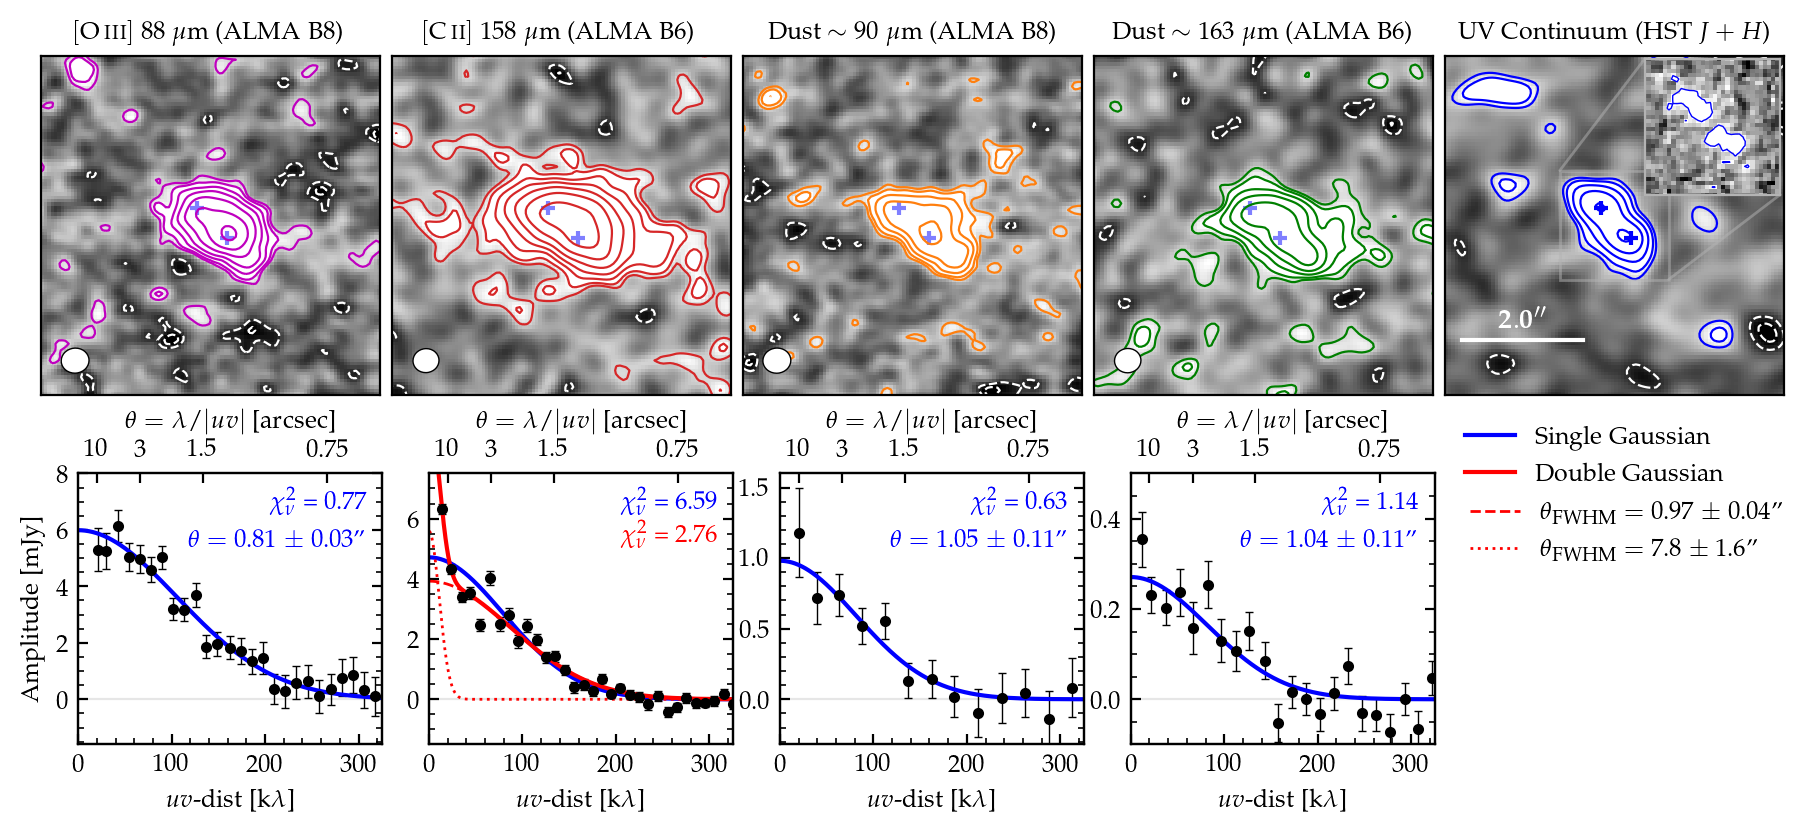

In [9]:
from base import *


fig = plt.figure(figsize=(9,4.2), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=3, ncols=10, figure=fig, 
                           height_ratios=[1,0.18,0.8], width_ratios=[0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1])
gs.update(hspace=0.04, wspace=0.05, left=0.02, right=0.99, top=0.93, bottom=0.11)

ax00 = plt.subplot(gs[0,0:2])
ax01 = plt.subplot(gs[0,2:4])
ax02 = plt.subplot(gs[0,4:6])
ax03 = plt.subplot(gs[0,6:8])
ax04 = plt.subplot(gs[0,8:10])

ax10 = plt.subplot(gs[2,1])
ax11 = plt.subplot(gs[2,3])
ax12 = plt.subplot(gs[2,5])
ax13 = plt.subplot(gs[2,7])
ax14 = plt.subplot(gs[1:,8:])

weighting_default = 'natural_uv0'
weighting_b6 = 'natural_uv0.3'
cmap = 'gray'
R = 2.8
R_s = 5.9

def fibonacci(n):
    if n==0: return 0;
    if n==1: return 1;
    return fibonacci(n-1)+fibonacci(n-2)

levels = np.array([fibonacci(n) for n in range(3,12)])
print(levels)



im = image('OIII','linemfs',weighting_default, correct_mu=False)
ax00.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax00.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax00.contour(im.data, extent=im.extent, levels=levels*im.std, colors='m', linewidths=0.8)
ax00.plotBeam(im, (0.8*R,-0.8*R))

im = image('CII','linemfs',weighting_b6, correct_mu=False)
ax01.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax01.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax01.contour(im.data, extent=im.extent, levels=levels*im.std, colors='tab:red', linewidths=0.8)
ax01.plotBeam(im, (0.8*R,-0.8*R))


im = image('OIII','continuum',weighting_default, correct_mu=False)
ax02.imshow(im.data, extent=im.extent, cmap=cmap, vmin=-3*im.std, vmax=3*im.std)
ax02.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax02.contour(im.data, extent=im.extent, levels=levels*im.std, colors='tab:orange', linewidths=0.8)
ax02.plotBeam(im, (0.8*R,-0.8*R))


im = image('CII','continuum',weighting_b6, correct_mu=False)
ax03.imshow(im.data, extent=im.extent, cmap=cmap, vmin=-3*im.std, vmax=3*im.std)
ax03.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax03.contour(im.data, extent=im.extent, levels=levels*im.std, colors='g', linewidths=0.8)
ax03.plotBeam(im, (0.8*R,-0.8*R))


im1 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting_default), correct_mu=False)
im2 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting_default), correct_mu=False)
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)

ax04.imshow(data, extent=im1.extent, cmap=cmap, vmin=-3*std, vmax=3*std)
ax04.contour(data, extent=im1.extent, levels=np.array([-3,-2])*std, colors='w', linewidths=0.8)
ax04.contour(data, extent=im1.extent, levels=levels*std, colors='b', linewidths=0.8)


iim1 = HSTimage('F160W', correct_mu=False, convolve=False, mask=True)
iim2 = HSTimage('F125W', correct_mu=False, convolve=False, mask=True)
data = iim1.data + iim2.data
std = np.sqrt(iim1.std**2 + iim2.std**2)

iax04 = ax04.inset_axes([0.59,0.59,0.4,0.4])
extent = (im1.extent[0]*-1, im1.extent[1]*-1, im1.extent[2], im1.extent[3])
iax04.imshow(data, vmin=-3*std, vmax=3*std, extent=extent, cmap=cmap)
iax04.contour(data, extent=extent, colors='b', linewidths=0.5, levels=[3*std])
iax04.set_xlim(-0.9,0.9)
iax04.set_ylim(-0.9,0.9)
iax04.tick_params(direction='in', which='both', labelleft=False,labelbottom=False,
                  left=False,right=False,bottom=False,top=False)
iax04.spines['bottom'].set_color('0.7')
iax04.spines['top'].set_color('0.7')
iax04.spines['right'].set_color('0.7')
iax04.spines['left'].set_color('0.7')
ax04.indicate_inset_zoom(iax04, edgecolor='0.7')

y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im1.x0 - x) * im1.cell
y = (y - im1.y0) * im1.cell
ax00.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax01.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax02.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax03.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax04.scatter([x],[y], marker='+', color='b', s=23)

data[:im1.y0,:] = 0
y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im1.x0 - x) * im1.cell
y = (y - im1.y0) * im1.cell
ax00.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax01.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax02.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax03.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax04.scatter([x],[y], marker='+', color='b', s=23)


for ax in [ax00,ax01,ax02,ax03,ax04]:
    ax.set_xlim(R,-R)
    ax.set_ylim(-R,R)
    ax.tick_params(direction='in', which='both', labelleft=False, labelbottom=False, 
                   left=False,right=False,bottom=False,top=False)
    ax.set_aspect('equal')
    
ax00.set_title(r'$[{\rm O}\,\textsc{iii}]~88~\mu$m (ALMA B8)', fontsize=9)
ax01.set_title(r'$[{\rm C}\,\textsc{ii}]~158~\mu$m (ALMA B6)', fontsize=9)
ax02.set_title(r'Dust $\sim 90~\mu$m (ALMA B8)', fontsize=9)
ax03.set_title(r'Dust $\sim 163~\mu$m (ALMA B6)', fontsize=9)
ax04.set_title(r'UV Continuum (HST $J+H$)', fontsize=9)

ax04.plot([0.9*R, 0.9*R-2],[-0.68*R,-0.68*R], color='w', linewidth=1.5)
ax04.annotate(r"$\mathbf{2.0''}$", (np.mean([0.9*R, 0.9*R-2]), -0.65*R), va='bottom', ha='center', color='w', fontsize=10)


vis = np.loadtxt('Data/to_Hollis_20211001/uvdist_oiii_430km.dat')
x, y, yerr = vis[:,0], vis[:,1], vis[:,2]
x_fit = np.linspace(0, np.max(x), 1000)

ax10.errorbar(x, y, yerr=yerr, color='k', marker='o', markersize=3, 
              linewidth=0, elinewidth=0.5, capthick=0.5, capsize=1.5)

coeff, var_matrix = curve_fit(gauss, x, y, sigma=yerr, p0=[6,50])
ax10.plot(x_fit, gauss(x_fit, *coeff), color='b')

chisq = redChiSq(y, gauss(x, *coeff), yerr, 2)
ax10.annotate(fr'$\chi^2_\nu$ = {chisq:.2f}', (0.95, 0.95), 
              color='b', xycoords='axes fraction', va='top', ha='right')

sigma = coeff[1]
sigma_err = np.sqrt(np.diag(var_matrix))[1]
theta = 200/(2*np.sqrt(2*np.log(2))*sigma)
theta_err = theta * sigma_err/sigma
ax10.annotate(r'$\theta =$ '+fr"{theta:.2f} $\pm$ {theta_err:.2f}''", (0.95, 0.8), 
              color='b', xycoords='axes fraction', va='top', ha='right')


ax10.tick_params(direction='in', which='both')
ax10.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax10.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
xmin, xmax = 0, 325
ax10.set_xlim(xmin, xmax)
ax10.set_ylim(-8/5, 8)

ax10.set_xlabel(r'$uv$-dist [k$\lambda$]')
ax10.set_ylabel(r'Amplitude [mJy]')

ax10_1 = ax10.twiny()
ax10_1.tick_params(direction='in')
ax10_1.set_xlim(xmin, xmax)
ax10_1.set_xticks([200/10, 200/3, 200/1.5, 200/0.75])
ax10_1.set_xticklabels(['10','3','1.5','0.75'])
ax10_1.set_xlabel(r'$\theta = \lambda /|uv|$ [arcsec]')



vis = np.loadtxt('Data/to_Hollis_20211001/uvdist_cii_380km.dat')
x, y, yerr = vis[:,0], vis[:,1], vis[:,2]
x_fit = np.linspace(0, np.max(x), 1000)


ax11.errorbar(x, y, yerr=yerr, color='k', marker='o', markersize=3, 
              linewidth=0, elinewidth=0.5, capthick=0.5, capsize=1.5)

coeff, var_matrix = curve_fit(gauss, x, y, sigma=yerr, p0=[6,50])
ax11.plot(x_fit, gauss(x_fit, *coeff), color='b')

chisq = redChiSq(y, gauss(x, *coeff), yerr, 2)
ax11.annotate(fr'$\chi^2_\nu$ = {chisq:.2f}', (0.95, 0.95), 
            color='b', xycoords='axes fraction', va='top', ha='right')

coeff, var_matrix = curve_fit(gauss2, x, y, sigma=yerr, p0=[6,50, 6, 20])
ax11.plot(x_fit, gauss2(x_fit, *coeff), color='r')

chisq = redChiSq(y, gauss2(x, *coeff), yerr, 4)
ax11.annotate(fr'$\chi^2_\nu$ = {chisq:.2f}', (0.95, 0.83), 
            color='r', xycoords='axes fraction', va='top', ha='right')

coeff_cii_double = coeff
coeff_err_cii_double = np.sqrt(np.diag(var_matrix))
ax11.plot(x_fit, gauss(x_fit, *coeff[:2]), color='r', linestyle='--', linewidth=1)
ax11.plot(x_fit, gauss(x_fit, *coeff[2:]), color='r', linestyle=':', linewidth=1)

ax11.tick_params(direction='in', which='both')
ax11.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax11.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
xmin, xmax = 0, 325
ax11.set_xlim(xmin, xmax)
ax11.set_ylim(-7.5/5, 7.5)
ax11.set_xlabel(r'$uv$-dist [k$\lambda$]')


ax11_1 = ax11.twiny()
ax11_1.tick_params(direction='in')
ax11_1.set_xlim(xmin, xmax)
ax11_1.set_xticks([200/10, 200/3, 200/1.5, 200/0.75])
ax11_1.set_xticklabels(['10','3','1.5','0.75'])
ax11_1.set_xlabel(r'$\theta = \lambda /|uv|$ [arcsec]')





vis = np.loadtxt('Data/to_Hollis_20211001/uvdist_cont_Band8.dat')
x, y, yerr = vis[:,0], vis[:,1], vis[:,2]
x_fit = np.linspace(0, np.max(x), 1000)

ax12.errorbar(x, y, yerr=yerr, color='k', marker='o', markersize=3, 
              linewidth=0, elinewidth=0.5, capthick=0.5, capsize=1.5)

coeff, var_matrix = curve_fit(gauss, x, y, sigma=yerr, p0=[6,50])
ax12.plot(x_fit, gauss(x_fit, *coeff), color='b')

chisq = redChiSq(y, gauss(x, *coeff), yerr, 2)
ax12.annotate(fr'$\chi^2_\nu$ = {chisq:.2f}', (0.95, 0.95), 
            color='b', xycoords='axes fraction', va='top', ha='right')

ax12.tick_params(direction='in', which='both')
ax12.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax12.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
xmin, xmax = 0, 325
ax12.set_xlim(xmin, xmax)
ax12.set_ylim(-1.6/5, 1.6)
ax12.set_xlabel(r'$uv$-dist [k$\lambda$]')

ax12_1 = ax12.twiny()
ax12_1.tick_params(direction='in')
ax12_1.set_xlim(xmin, xmax)
ax12_1.set_xticks([200/10, 200/3, 200/1.5, 200/0.75])
ax12_1.set_xticklabels(['10','3','1.5','0.75'])
ax12_1.set_xlabel(r'$\theta = \lambda /|uv|$ [arcsec]')

sigma = coeff[1]
sigma_err = np.sqrt(np.diag(var_matrix))[1]
theta = 200/(2*np.sqrt(2*np.log(2))*sigma)
theta_err = theta * sigma_err/sigma
ax12.annotate(r'$\theta =$ '+fr"{theta:.2f} $\pm$ {theta_err:.2f}''", (0.95, 0.8), 
              color='b', xycoords='axes fraction', va='top', ha='right')




vis = np.loadtxt('Data/to_Hollis_20211001/uvdist_cont_Band6.dat')
x, y, yerr = vis[:,0], vis[:,1], vis[:,2]
x_fit = np.linspace(0, np.max(x), 1000)

ax13.errorbar(x, y, yerr=yerr, color='k', marker='o', markersize=3, 
              linewidth=0, elinewidth=0.5, capthick=0.5, capsize=1.5)

coeff, var_matrix = curve_fit(gauss, x, y, sigma=yerr, p0=[6,50])
ax13.plot(x_fit, gauss(x_fit, *coeff), color='b')

chisq = redChiSq(y, gauss(x, *coeff), yerr, 2)
ax13.annotate(fr'$\chi^2_\nu$ = {chisq:.2f}', (0.95, 0.95), 
            color='b', xycoords='axes fraction', va='top', ha='right')

ax13.tick_params(direction='in', which='both')
ax13.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(20))
ax13.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
xmin, xmax = 0, 325
ax13.set_xlim(xmin, xmax)
ax13.set_ylim(-0.5/5, 0.5)

ax13.set_xlabel(r'$uv$-dist [k$\lambda$]')

ax13_1 = ax13.twiny()
ax13_1.tick_params(direction='in')
ax13_1.set_xlim(xmin, xmax)
ax13_1.set_xticks([200/10, 200/3, 200/1.5, 200/0.75])
ax13_1.set_xticklabels(['10','3','1.5','0.75'])
ax13_1.set_xlabel(r'$\theta = \lambda /|uv|$ [arcsec]')

sigma = coeff[1]
sigma_err = np.sqrt(np.diag(var_matrix))[1]
theta = 200/(2*np.sqrt(2*np.log(2))*sigma)
theta_err = theta * sigma_err/sigma
ax13.annotate(r'$\theta =$ '+fr"{theta:.2f} $\pm$ {theta_err:.2f}''", (0.95, 0.8), 
              color='b', xycoords='axes fraction', va='top', ha='right')




ax14.axis('off')
p1, = ax14.plot([5,10],[5,10], color='b')
p2, = ax14.plot([5,10],[5,10], color='r')
p3, = ax14.plot([5,10],[5,10], color='r', linewidth=1, linestyle='--')
p4, = ax14.plot([5,10],[5,10], color='r', linewidth=1, linestyle=':')
ax14.set_xlim(0, 1)
ax14.set_ylim(0, 1)

sigma1, sigma2 = coeff_cii_double[1], coeff_cii_double[3]
sigma_err1, sigma_err2 = coeff_err_cii_double[1], coeff_err_cii_double[3]

theta1 = 200/(2*np.sqrt(2*np.log(2))*sigma1)
theta2 = 200/(2*np.sqrt(2*np.log(2))*sigma2)
theta_err1 = theta1 * sigma_err1/sigma1
theta_err2 = theta2 * sigma_err2/sigma2

leg1 = ax14.legend((p1,p2),('Single Gaussian', r'Double Gaussian'), loc='upper left')
leg2 = ax14.legend((p3,p4),(r'$\theta_{\rm FWHM} =$ '+fr"{theta1:.2f} $\pm$ {theta_err1:.2f}''", 
                            r'$\theta_{\rm FWHM} =$ '+fr"{theta2:.1f} $\pm$ {theta_err2:.1f}''"),
                   loc=(0.05,0.5))

ax14.add_artist(leg1)

for ax in [ax10, ax11, ax12, ax13]:
    ax.plot([0, 400], [0,0], color='0.9', linewidth=0.8, zorder=-1000)

    
plt.savefig('plots/maps_vis.pdf')
plt.show()

[ 2  3  5  8 13 21 34 55 89]
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


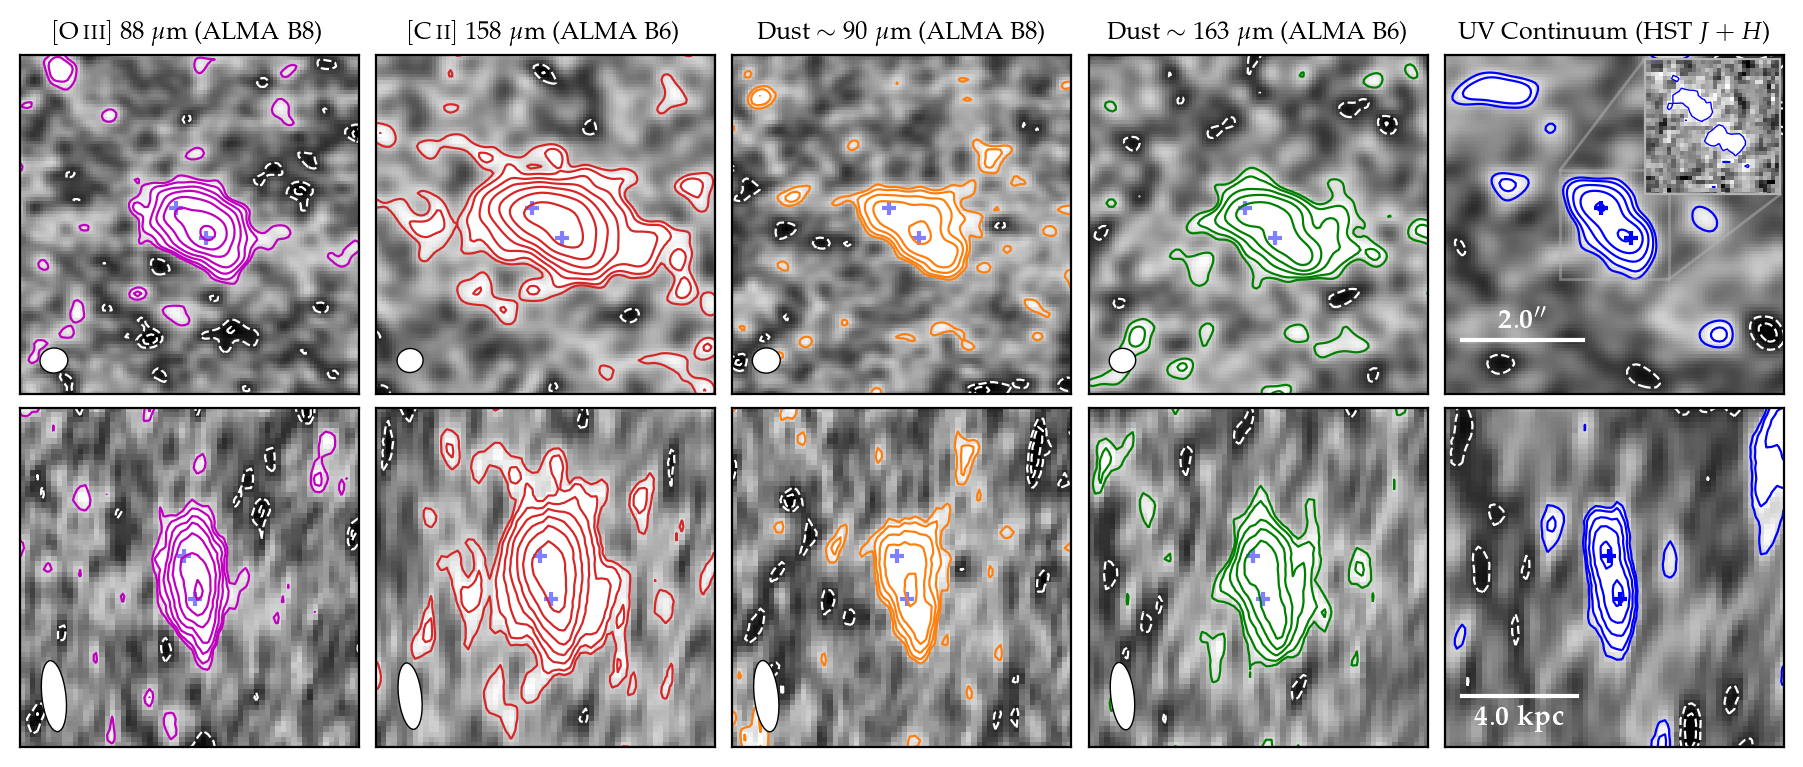

In [2]:
from base import *


fig = plt.figure(figsize=(9,3.8), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=5, figure=fig, height_ratios=[1,1])
gs.update(hspace=0.04, wspace=0.05, left=0.01, right=0.99, top=0.93, bottom=0.02)

ax00 = plt.subplot(gs[0,0])
ax01 = plt.subplot(gs[0,1])
ax02 = plt.subplot(gs[0,2])
ax03 = plt.subplot(gs[0,3])
ax04 = plt.subplot(gs[0,4])

ax10 = plt.subplot(gs[1,0])
ax11 = plt.subplot(gs[1,1])
ax12 = plt.subplot(gs[1,2])
ax13 = plt.subplot(gs[1,3])
ax14 = plt.subplot(gs[1,4])

weighting_default = 'natural_uv0'
weighting_b6 = 'natural_uv0.3'
cmap = 'gray'
R = 2.8
R_s = 5.9

def fibonacci(n):
    if n==0: return 0;
    if n==1: return 1;
    return fibonacci(n-1)+fibonacci(n-2)

levels = np.array([fibonacci(n) for n in range(3,12)])
print(levels)



im = image('OIII','linemfs',weighting_default, correct_mu=False)
ax00.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax00.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax00.contour(im.data, extent=im.extent, levels=levels*im.std, colors='m', linewidths=0.8)
ax00.plotBeam(im, (0.8*R,-0.8*R))

im = image('OIII','linemfs',weighting_default, correct_mu=True)
im.Reconstruct()
ax10.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax10.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax10.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='m', linewidths=0.8, zorder=2)
ax10.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)



im = image('CII','linemfs',weighting_b6, correct_mu=False)
ax01.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax01.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax01.contour(im.data, extent=im.extent, levels=levels*im.std, colors='tab:red', linewidths=0.8)
ax01.plotBeam(im, (0.8*R,-0.8*R))

im = image('CII','linemfs',weighting_b6, correct_mu=True)
im.Reconstruct()
ax11.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax11.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax11.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='tab:red', linewidths=0.8, zorder=2)
ax11.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)

#ax10.annotate(r'$[{\rm C}\,\textsc{ii}]~158~\mu$m', (0,0.8), xycoords='axes fraction', va='top', ha='left', color='k')



# im.data[:im.y0,:] = 0
# y, x = np.unravel_index(np.nanargmax(im.data), shape=np.shape(im.data))
# x = (im.x0 - x) * im.cell
# y = (y - im.y0) * im.cell
# ax0.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)
# ax1.scatter([x],[y], marker='x', color='tab:red', s=22)
# ax2.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)


im = image('OIII','continuum',weighting_default, correct_mu=False)
ax02.imshow(im.data, extent=im.extent, cmap=cmap, vmin=-3*im.std, vmax=3*im.std)
ax02.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax02.contour(im.data, extent=im.extent, levels=levels*im.std, colors='tab:orange', linewidths=0.8)
ax02.plotBeam(im, (0.8*R,-0.8*R))

im = image('OIII','continuum',weighting_default, correct_mu=True)
im.Reconstruct()
ax12.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax12.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax12.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='tab:orange', linewidths=0.8, zorder=2)
ax12.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)


im = image('CII','continuum',weighting_b6, correct_mu=False)
ax03.imshow(im.data, extent=im.extent, cmap=cmap, vmin=-3*im.std, vmax=3*im.std)
ax03.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax03.contour(im.data, extent=im.extent, levels=levels*im.std, colors='g', linewidths=0.8)
ax03.plotBeam(im, (0.8*R,-0.8*R))

im = image('CII','continuum',weighting_b6, correct_mu=True)
im.Reconstruct()
ax13.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax13.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax13.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='g', linewidths=0.8, zorder=2)
ax13.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)


im1 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting_default), correct_mu=False)
im2 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting_default), correct_mu=False)
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)

ax04.imshow(data, extent=im1.extent, cmap=cmap, vmin=-3*std, vmax=3*std)
ax04.contour(data, extent=im1.extent, levels=np.array([-3,-2])*std, colors='w', linewidths=0.8)
ax04.contour(data, extent=im1.extent, levels=levels*std, colors='b', linewidths=0.8)


iim1 = HSTimage('F160W', correct_mu=False, convolve=False, mask=True)
iim2 = HSTimage('F125W', correct_mu=False, convolve=False, mask=True)
data = iim1.data + iim2.data
std = np.sqrt(iim1.std**2 + iim2.std**2)

iax04 = ax04.inset_axes([0.59,0.59,0.4,0.4])
extent = (im1.extent[0]*-1, im1.extent[1]*-1, im1.extent[2], im1.extent[3])
iax04.imshow(data, vmin=-3*std, vmax=3*std, extent=extent, cmap=cmap)
iax04.contour(data, extent=extent, colors='b', linewidths=0.5, levels=[3*std])
iax04.set_xlim(-0.9,0.9)
iax04.set_ylim(-0.9,0.9)
iax04.tick_params(direction='in', which='both', labelleft=False,labelbottom=False,
                  left=False,right=False,bottom=False,top=False)
iax04.spines['bottom'].set_color('0.7')
iax04.spines['top'].set_color('0.7')
iax04.spines['right'].set_color('0.7')
iax04.spines['left'].set_color('0.7')
ax04.indicate_inset_zoom(iax04, edgecolor='0.7')

y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im1.x0 - x) * im1.cell
y = (y - im1.y0) * im1.cell
ax00.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax01.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax02.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax03.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax04.scatter([x],[y], marker='+', color='b', s=23)

data[:im1.y0,:] = 0
y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im1.x0 - x) * im1.cell
y = (y - im1.y0) * im1.cell
ax00.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax01.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax02.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax03.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax04.scatter([x],[y], marker='+', color='b', s=23)


im1 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting_default), correct_mu=True)
im2 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting_default), correct_mu=True)
im1.Reconstruct()
im2.Reconstruct()
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)

ax14.imshow(data, extent=im1.extent_kpc, cmap=cmap, vmin=-3*std, vmax=3*std, zorder=0)
ax14.contour(data, extent=im1.extent_kpc, levels=np.array([-3,-2])*std, colors='w', linewidths=0.8, zorder=2)
ax14.contour(data, extent=im1.extent_kpc, levels=levels*std, colors='b', linewidths=0.8, zorder=2)

y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = -(im1.x0 - x) * im1.cell_kpc
y = (y - im1.y0) * im1.cell_kpc
ax10.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax11.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax12.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax13.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax14.scatter([x],[y], marker='+', color='b', s=23)

data[im1.y0:,:] = 0
y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = -(im1.x0 - x) * im1.cell_kpc
y = (y - im1.y0) * im1.cell_kpc
ax10.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax11.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax12.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax13.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax14.scatter([x],[y], marker='+', color='b', s=23)



for ax in [ax00,ax01,ax02,ax03,ax04]:
    ax.set_xlim(R,-R)
    ax.set_ylim(-R,R)
    ax.tick_params(direction='in', which='both', labelleft=False, labelbottom=False, 
                   left=False,right=False,bottom=False,top=False)
    ax.set_aspect('equal')
    
for ax in [ax10,ax11,ax12,ax13,ax14]:
    ax.set_xlim(R_s,-R_s)
    ax.set_ylim(-R_s,R_s)
    ax.tick_params(direction='in', which='both', labelleft=False, labelbottom=False, 
                   left=False,right=False,bottom=False,top=False)
    ax.set_aspect('equal')

    
ax00.set_title(r'$[{\rm O}\,\textsc{iii}]~88~\mu$m (ALMA B8)', fontsize=9)
ax01.set_title(r'$[{\rm C}\,\textsc{ii}]~158~\mu$m (ALMA B6)', fontsize=9)
ax02.set_title(r'Dust $\sim 90~\mu$m (ALMA B8)', fontsize=9)
ax03.set_title(r'Dust $\sim 163~\mu$m (ALMA B6)', fontsize=9)
ax04.set_title(r'UV Continuum (HST $J+H$)', fontsize=9)

ax04.plot([0.9*R, 0.9*R-2],[-0.68*R,-0.68*R], color='w', linewidth=1.5)
ax04.annotate(r"$\mathbf{2.0''}$", (np.mean([0.9*R, 0.9*R-2]), -0.65*R), va='bottom', ha='center', color='w', fontsize=10)


ax14.plot([0.9*R_s, 0.9*R_s-4],[-0.7*R_s,-0.7*R_s], color='w', linewidth=1.5)
ax14.annotate(r"$\mathbf{4.0~kpc}$", (np.mean([0.9*R_s, 0.9*R_s-4]), -0.75*R_s), va='top', ha='center', color='w', fontsize=10)
    
    
plt.savefig('plots/maps.pdf')
plt.show()

[ 2  3  5  8 13 21 34 55 89]
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.
Performing source-plane reconstruction. Image-plane properties will be overwritten with source-plane properties.


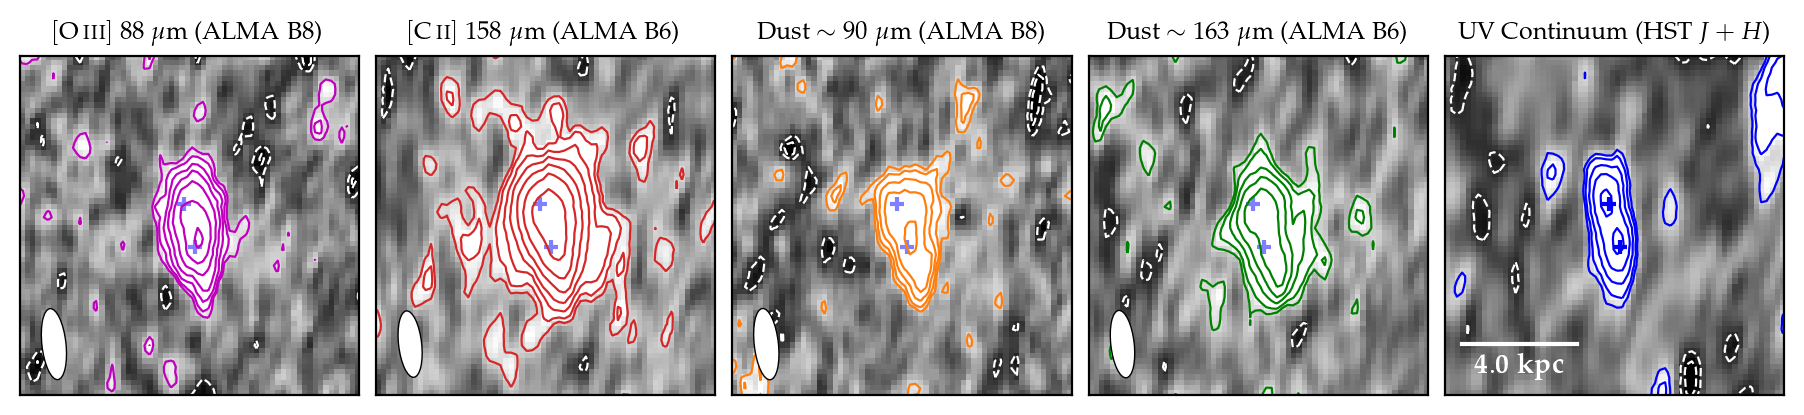

In [228]:
from base import *


fig = plt.figure(figsize=(9,2), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=1, ncols=5, figure=fig)
gs.update(hspace=0.04, wspace=0.05, left=0.01, right=0.99, top=0.93, bottom=0.02)

ax10 = plt.subplot(gs[0,0])
ax11 = plt.subplot(gs[0,1])
ax12 = plt.subplot(gs[0,2])
ax13 = plt.subplot(gs[0,3])
ax14 = plt.subplot(gs[0,4])

weighting_default = 'natural_uv0'
weighting_b6 = 'natural_uv0.3'
cmap = 'gray'
R = 2.8
R_s = 5.9

def fibonacci(n):
    if n==0: return 0;
    if n==1: return 1;
    return fibonacci(n-1)+fibonacci(n-2)

levels = np.array([fibonacci(n) for n in range(3,12)])
print(levels)


im = image('OIII','linemfs',weighting_default, correct_mu=True)
im.Reconstruct()
ax10.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax10.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax10.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='m', linewidths=0.8, zorder=2)
ax10.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)

im = image('CII','linemfs',weighting_b6, correct_mu=True)
im.Reconstruct()
ax11.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax11.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax11.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='tab:red', linewidths=0.8, zorder=2)
ax11.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)

im = image('OIII','continuum',weighting_default, correct_mu=True)
im.Reconstruct()
ax12.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax12.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax12.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='tab:orange', linewidths=0.8, zorder=2)
ax12.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)

im = image('CII','continuum',weighting_b6, correct_mu=True)
im.Reconstruct()
ax13.imshow(im.data*1e3, extent=im.extent_kpc, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3, zorder=0)
ax13.contour(im.data, extent=im.extent_kpc, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8, zorder=2)
ax13.contour(im.data, extent=im.extent_kpc, levels=levels*im.std, colors='g', linewidths=0.8, zorder=2)
ax13.plotBeam(im, (0.8*R_s,-0.7*R_s), kpc=True)


im1 = HSTimage('F160W', psfmatch=('OIII','continuum',weighting_default), correct_mu=True)
im2 = HSTimage('F125W', psfmatch=('OIII','continuum',weighting_default), correct_mu=True)
im1.Reconstruct()
im2.Reconstruct()
data = im1.data + im2.data
std = np.sqrt(im1.std**2 + im2.std**2)

ax14.imshow(data, extent=im1.extent_kpc, cmap=cmap, vmin=-3*std, vmax=3*std, zorder=0)
ax14.contour(data, extent=im1.extent_kpc, levels=np.array([-3,-2])*std, colors='w', linewidths=0.8, zorder=2)
ax14.contour(data, extent=im1.extent_kpc, levels=levels*std, colors='b', linewidths=0.8, zorder=2)

y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = -(im1.x0 - x) * im1.cell_kpc
y = (y - im1.y0) * im1.cell_kpc
ax10.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax11.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax12.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax13.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax14.scatter([x],[y], marker='+', color='b', s=23)

data[im1.y0:,:] = 0
y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = -(im1.x0 - x) * im1.cell_kpc
y = (y - im1.y0) * im1.cell_kpc
ax10.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax11.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax12.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax13.scatter([x],[y], marker='+', color='b', s=23, alpha=0.5)
ax14.scatter([x],[y], marker='+', color='b', s=23)
    
for ax in [ax10,ax11,ax12,ax13,ax14]:
    ax.set_xlim(R_s,-R_s)
    ax.set_ylim(-R_s,R_s)
    ax.tick_params(direction='in', which='both', labelleft=False, labelbottom=False, 
                   left=False,right=False,bottom=False,top=False)
    ax.set_aspect('equal')

    
ax10.set_title(r'$[{\rm O}\,\textsc{iii}]~88~\mu$m (ALMA B8)', fontsize=9)
ax11.set_title(r'$[{\rm C}\,\textsc{ii}]~158~\mu$m (ALMA B6)', fontsize=9)
ax12.set_title(r'Dust $\sim 90~\mu$m (ALMA B8)', fontsize=9)
ax13.set_title(r'Dust $\sim 163~\mu$m (ALMA B6)', fontsize=9)
ax14.set_title(r'UV Continuum (HST $J+H$)', fontsize=9)

ax14.plot([0.9*R_s, 0.9*R_s-4],[-0.7*R_s,-0.7*R_s], color='w', linewidth=1.5)
ax14.annotate(r"$\mathbf{4.0~kpc}$", (np.mean([0.9*R_s, 0.9*R_s-4]), -0.75*R_s), va='top', ha='center', color='w', fontsize=10)
        
plt.savefig('plots/maps_splane.pdf')
plt.show()

In [91]:
im = image('CO','continuum','natural_uv0')
print('3', end=' & ')
print('402.5', end=' & ')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
print('   -   ', end=' & ')
im = image('CO','continuum','natural_uv0', correct_mu=False)
print(fr"{np.nanstd(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
print('   -   ', end=' & ')
print(r'Knudsen et al.~(in prep) \\')

print('6', end=' & ')
print('163.0', end=' & ')
im = image('CII','continuum','natural_uv0.3')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('CII','continuum','natural_uv0.7')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('CII','continuum','natural_uv0.3', correct_mu=False)
print(fr"{np.std(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
im = image('CII','continuum','natural_uv0.7', correct_mu=False)
print(fr"{np.std(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
print(r'Knudsen et al.~(in prep) \\')

print('7', end=' & ')
print('107.2', end=' & ')
im = image('NII','continuum','natural_uv0')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('NII','continuum','natural_uv0.5')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('NII','continuum','natural_uv0', correct_mu=False)
print(fr"{np.std(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
im = image('NII','continuum','natural_uv0.5', correct_mu=False)
print(fr"{np.std(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
print(r'\citet{knudsen_merger_2017} \\')

print('8', end=' & ')
print('89.5', end=' & ')
im = image('OIII','continuum','natural_uv0')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('OIII','continuum','natural_uv0.5')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('OIII','continuum','natural_uv0', correct_mu=False)
print(fr"{np.nanstd(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
im = image('OIII','continuum','natural_uv0.5', correct_mu=False)
print(fr"{np.nanstd(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
print(r'\citet{inoue_radiative_2020} \\')

print('9', end=' & ')
print('53.0', end=' & ')
im = image('OIII52','continuum','natural_uv0')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('OIII52','continuum','natural_uv0.5')
print(fr"{im.header['BMAJ']*60*60:.2f} \times {im.header['BMIN']*60*60:.2f}", end=' & ')
im = image('OIII52','continuum','natural_uv0', correct_mu=False)
print(fr"{np.nanstd(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
im = image('OIII52','continuum','natural_uv0.5', correct_mu=False)
print(fr"{np.nanstd(im.residual)*im.NPixPerBeam*1e6:.1f}", end=' & ')
print(r'\citet{bakx_accurate_2021}')

3 & 402.5 & 0.55 \times 0.46 &    -    & 10.4 &    -    & Knudsen et al.~(in prep) \\
6 & 163.0 & 0.44 \times 0.40 & 0.82 \times 0.73 & 5.0 & 7.4 & Knudsen et al.~(in prep) \\
7 & 107.2 & 0.62 \times 0.58 & 0.78 \times 0.74 & 44.4 & 45.8 & \citet{knudsen_merger_2017} \\
8 & 89.5 & 0.46 \times 0.42 & 0.72 \times 0.69 & 23.9 & 22.3 & \citet{inoue_radiative_2020} \\
9 & 53.0 & 0.52 \times 0.43 & 0.67 \times 0.61 & 180.1 & 202.0 & \citet{bakx_accurate_2021}


[ 2  3  5  8 13 21 34 55 89]


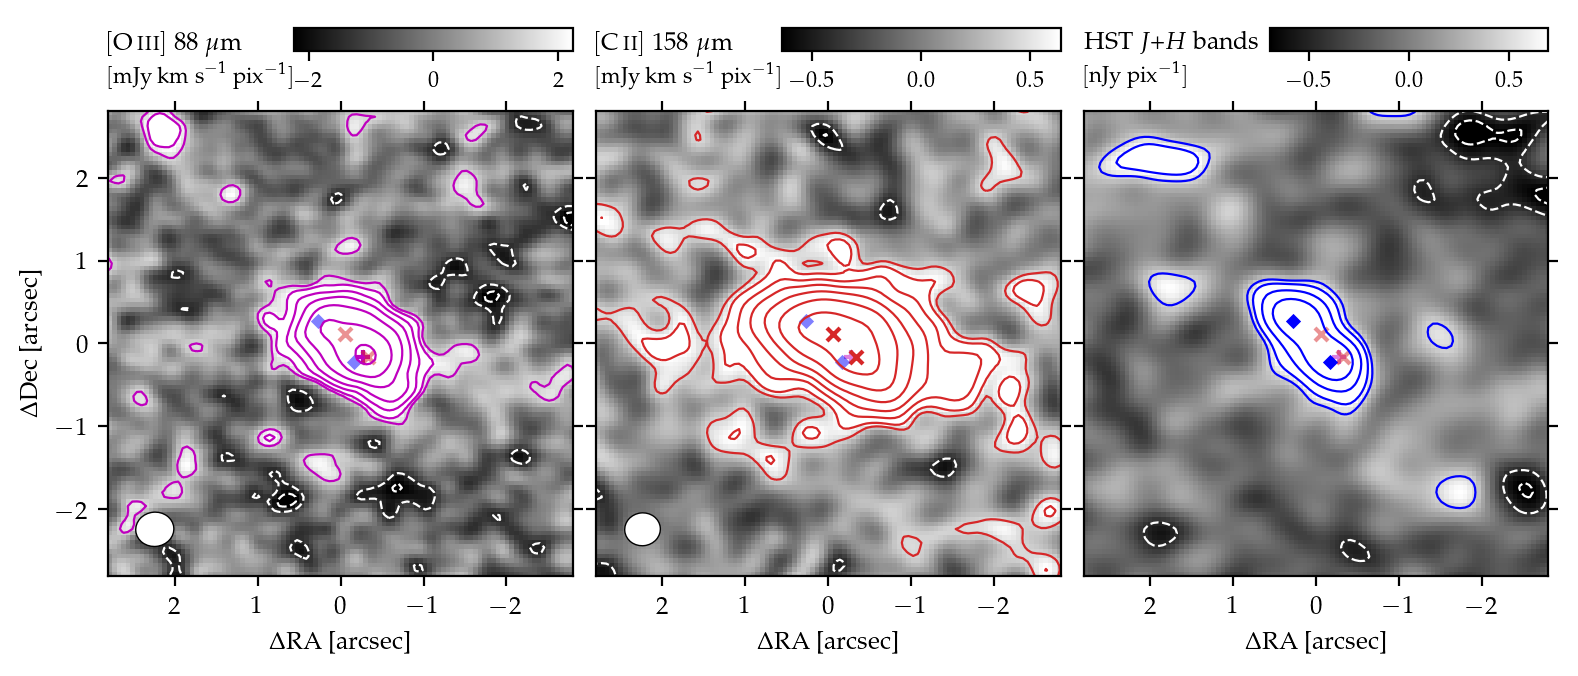

In [10]:
from base import *


fig = plt.figure(figsize=(8,3.3), constrained_layout=False)
gs = mpl.gridspec.GridSpec(nrows=2, ncols=3, figure=fig, height_ratios=[0.1,1])
gs.update(hspace=0, wspace=0.05, left=0.08, right=0.98, top=0.98, bottom=0.08)
ax0 = plt.subplot(gs[1,0])
ax1 = plt.subplot(gs[1,1], sharey=ax0)
ax2 = plt.subplot(gs[1,2], sharey=ax1)
cax00 = plt.subplot(gs[0,0])
cax00.axis('off')
cax10 = plt.subplot(gs[0,1])
cax10.axis('off')
cax20 = plt.subplot(gs[0,2])
cax20.axis('off')

cmap = 'gray'
R = 2.8

def fibonacci(n):
    if n==0: return 0;
    if n==1: return 1;
    return fibonacci(n-1)+fibonacci(n-2)

levels = np.array([fibonacci(n) for n in range(3,12)])
print(levels)


im = image('OIII','linemfs','natural_uv0', correct_mu=False)
m = ax0.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax0.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax0.contour(im.data, extent=im.extent, levels=levels*im.std, colors='m', linewidths=0.8)
ax0.plotBeam(im, (0.8*R,-0.8*R))
cax0 = ax0.inset_axes([0.4,1.13,0.6,0.05])
cbar = plt.colorbar(mappable=m, cax=cax0, orientation='horizontal', aspect=20)
cbar.ax.tick_params(labelsize=8) 
cax00.annotate(r'$[{\rm O}\,\textsc{iii}]~88~\mu$m', (0,0.8), xycoords='axes fraction', va='top', ha='left', color='k')
cax00.annotate(r'$[{\rm mJy}~{\rm km~s}^{-1}~{\rm pix}^{-1}]$', (0,0.2), xycoords='axes fraction', va='top', ha='left', color='k', fontsize=8)

y, x = np.unravel_index(np.nanargmax(im.data), shape=np.shape(im.data))
x = (im.x0 - x) * im.cell
y = (y - im.y0) * im.cell
ax0.scatter([x],[y], marker='+', color='m', s=22)
ax1.scatter([x],[y], marker='+', color='m', s=22, alpha=0.5)
ax2.scatter([x],[y], marker='+', color='m', s=22, alpha=0.5)


im = image('CII','linemfs','natural_uv0.3', correct_mu=False)
m = ax1.imshow(im.data*1e3, extent=im.extent, cmap=cmap, vmin=-3*im.std*1e3, vmax=3*im.std*1e3)
ax1.contour(im.data, extent=im.extent, levels=np.array([-3,-2])*im.std, colors='w', linewidths=0.8)
ax1.contour(im.data, extent=im.extent, levels=levels*im.std, colors='tab:red', linewidths=0.8)
ax1.plotBeam(im, (0.8*R,-0.8*R))
cax1 = ax1.inset_axes([0.4,1.13,0.6,0.05])
cbar = plt.colorbar(mappable=m, cax=cax1, orientation='horizontal', aspect=20)
cbar.ax.tick_params(labelsize=8) 
cax10.annotate(r'$[{\rm C}\,\textsc{ii}]~158~\mu$m', (0,0.8), xycoords='axes fraction', va='top', ha='left', color='k')
cax10.annotate(r'$[{\rm mJy}~{\rm km~s}^{-1}~{\rm pix}^{-1}]$', (0,0.2), xycoords='axes fraction', va='top', ha='left', color='k', fontsize=8)

y, x = np.unravel_index(np.nanargmax(im.data), shape=np.shape(im.data))
x = (im.x0 - x) * im.cell
y = (y - im.y0) * im.cell
ax0.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)
ax1.scatter([x],[y], marker='x', color='tab:red', s=22)
ax2.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)

im.data[:im.y0,:] = 0
y, x = np.unravel_index(np.nanargmax(im.data), shape=np.shape(im.data))
x = (im.x0 - x) * im.cell
y = (y - im.y0) * im.cell
ax0.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)
ax1.scatter([x],[y], marker='x', color='tab:red', s=22)
ax2.scatter([x],[y], marker='x', color='tab:red', s=22, alpha=0.5)



im = HSTimage('F160W', psfmatch=('OIII','continuum','natural_uv0'), correct_mu=False)
data1 = im.data * (8.132) / (4*np.pi*(im.dl.to(u.cm).value)**2) * 1e23 * 1e9/im.nu_rest # now in units of nJy
std1 = im.std * (8.132) / (4*np.pi*(im.dl.to(u.cm).value)**2) * 1e23 * 1e9/im.nu_rest # now in units of nJy
im = HSTimage('F125W', psfmatch=('OIII','continuum','natural_uv0'), correct_mu=False)
data2 = im.data * (8.132) / (4*np.pi*(im.dl.to(u.cm).value)**2) * 1e23 * 1e9/im.nu_rest # now in units of nJy
std2 = im.std * (8.132) / (4*np.pi*(im.dl.to(u.cm).value)**2) * 1e23 * 1e9/im.nu_rest # now in units of nJy
data = data1 + data2
std = np.sqrt(std1**2 + std2**2)

m = ax2.imshow(data, extent=im.extent, cmap=cmap, vmin=-3*std, vmax=3*std)
ax2.contour(data, extent=im.extent, levels=np.array([-3,-2])*std, colors='w', linewidths=0.8)
ax2.contour(data, extent=im.extent, levels=levels*std, colors='b', linewidths=0.8)
cax2 = ax2.inset_axes([0.4,1.13,0.6,0.05])
cbar = plt.colorbar(mappable=m, cax=cax2, orientation='horizontal', aspect=20)
cbar.ax.tick_params(labelsize=8) 
cax20.annotate(r'HST $J$+$H$ bands', (0,0.8), xycoords='axes fraction', va='top', ha='left', color='k')
cax20.annotate(r'$[{\rm nJy}~{\rm pix}^{-1}]$', (0,0.2), xycoords='axes fraction', va='top', ha='left', color='k', fontsize=8)

y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im.x0 - x) * im.cell
y = (y - im.y0) * im.cell
ax0.scatter([x],[y], marker='D', color='b', s=15, linewidths=0, alpha=0.5)
ax1.scatter([x],[y], marker='D', color='b', s=15, linewidths=0, alpha=0.5)
ax2.scatter([x],[y], marker='D', color='b', s=15, linewidths=0)

data[:im.y0,:] = 0
y, x = np.unravel_index(np.nanargmax(data), shape=np.shape(data))
x = (im.x0 - x) * im.cell
y = (y - im.y0) * im.cell
ax0.scatter([x],[y], marker='D', color='b', s=15, linewidths=0, alpha=0.5)
ax1.scatter([x],[y], marker='D', color='b', s=15, linewidths=0, alpha=0.5)
ax2.scatter([x],[y], marker='D', color='b', s=15, linewidths=0)


for ax in [ax0,ax1,ax2]:
    ax.set_xlim(R,-R)
    ax.set_ylim(-R,R)
    ax.set_xlabel(r'$\Delta$RA [arcsec]')
    ax.set_yticks([-2,-1,0,1,2])
    
for ax in [ax1,ax2]:
    ax.tick_params(labelleft=False)

ax0.set_ylabel(r'$\Delta$Dec [arcsec]')

# ax0.annotate(r'$[{\rm O}\,\textsc{iii}]~88~\mu$m', (0.04,0.96), xycoords='axes fraction', va='top', color='w')
# ax1.annotate(r'\bf $[{\rm C}\,\textsc{ii}]~158~\mu$m', (0.04,0.96), xycoords='axes fraction', va='top', color='tab:red')
# ax2.annotate(r'HST stacked $J+H$-band', (0.04,0.96), xycoords='axes fraction', va='top', color='w')

plt.savefig('plots/CII_OIII_UV_iplane.pdf')
plt.show()